EN2550 Excercise 09

Index No.&nbsp;&nbsp;:&nbsp;190018V

Name&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;Abeywickrama K.C.S.

Github &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;https://github.com/KCSAbeywickrama/EN2550-Excercises

In [1]:
# imports
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def imshowBGR(img,ax=plt):
    ax.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

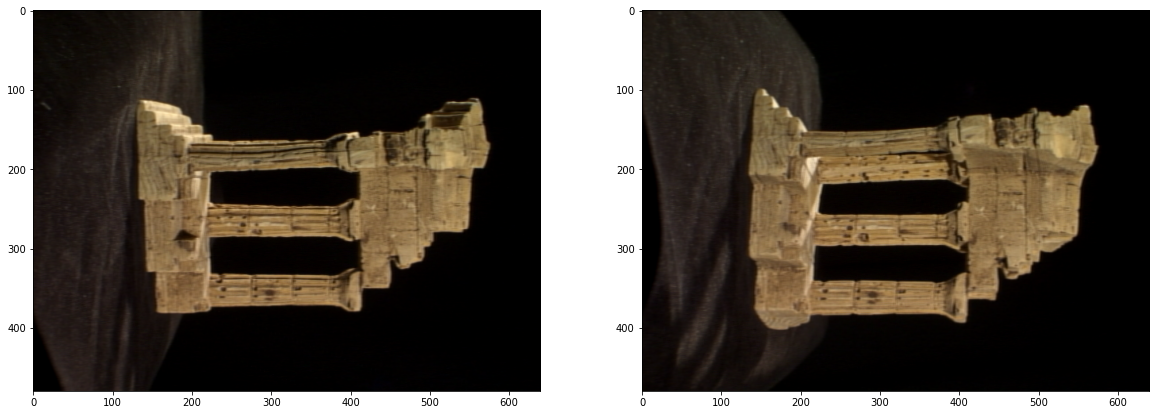

In [12]:
# q1

f = open('templeSparseRing/templeSR_par.txt', 'r')              
assert f is not None 

n = int(f.readline())                                                    
l    = f.readline().split()                                              
im1_fn = l[0] 

K1 = np.array( [float(i) for i in l[1:10] ]) .reshape((3,3))             
R1 = np.array( [float(i) for i in l[10:19] ]) .reshape((3,3))            
t1 = np.array( [float(i) for i in l[19:22] ]) .reshape((3,1))  

l    = f.readline().split()                                              
im2_fn = l[0]    

K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))                
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))               
t2 = np.array( [float(i) for i in l[19:22]]) .reshape((3,1))

im1 = cv.imread('templeSparseRing/' + im1_fn, cv. IMREAD_COLOR)
im2 = cv.imread('templeSparseRing/' + im2_fn, cv.IMREAD_COLOR) 
 
assert im1 is not None                                                   
assert im2 is not None                                                   

fig,ax=plt.subplots(1,2,figsize=(20,20))
imshowBGR(im1,ax[0])
imshowBGR(im2,ax[1])                                            


In [13]:
sift=cv.xfeatures2d.SIFT_create()
kp1,desc1=sift.detectAndCompute(im1,None)
kp2,desc2=sift.detectAndCompute(im2,None)

FLANN_INDEX_KDTREE=1
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_parms=dict(checks=100)

flann=cv.FlannBasedMatcher(index_params,search_parms)
mathes=flann.knnMatch(desc1,desc2,k=2)

good=[]
pts1=[]
pts2=[]

for i,(m,n) in enumerate(mathes):
    if m.distance < 0.7*n.distance:
        good.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1=np.array(pts1)
pts2=np.array(pts2)

F,mask=cv.findFundamentalMat(pts1,pts2,cv.FM_RANSAC)

F

array([[ 1.19353197e-06,  1.48128487e-05, -2.65668422e-02],
       [-8.37167541e-06,  6.34793204e-07,  2.04080864e-03],
       [ 2.41439516e-02, -5.73622910e-03,  1.00000000e+00]])

In [14]:
# q2

E= K2.T @ F @ K1

E

array([[ 2.75898779e+00,  3.43654884e+01, -3.42837514e+01],
       [-1.94221058e+01,  1.47803397e+00, -5.08742503e-01],
       [ 3.41148335e+01, -1.68046954e+00, -1.62748485e-02]])

In [15]:
# q3

retval,R,t,mask=cv.recoverPose(E,pts1,pts2,K1)

R,t

(array([[ 0.99754052, -0.07006883,  0.00181066],
        [ 0.06705657,  0.9615392 ,  0.2663565 ],
        [-0.02040431, -0.26557999,  0.96387288]]),
 array([[ 0.01312307],
        [-0.86850153],
        [-0.49551275]]))

In [20]:
# q4

R_t_1 = np.concatenate((R1,t1),axis=1) # 3 x 4
R2_ = R1 @ R
t2_ = R1 @ t
R_t_2 = np.concatenate((R2_,t2_),axis=1) # 3 x 4

P1=K1 @ np.hstack((R1,t1))
P2_ = K2 @ R_t_2

P2_

array([[ 1.56140182e+02,  1.53317827e+03, -1.67326558e+02,
        -9.66850517e+02],
       [ 1.53102041e+03, -1.25962559e+02, -1.71538765e+02,
         1.56694615e+02],
       [ 5.65837070e-02,  8.28361136e-02, -9.94955508e-01,
         6.45008519e-01]])

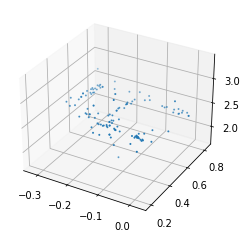

In [21]:
# q5

points4d = cv.triangulatePoints(P1,P2_,pts1.T,pts2.T)
points4d /= points4d[3,:]

X=points4d[0,:]
Y=points4d[1,:]
Z=points4d[2,:]

fig=plt.figure(1)
ax=fig.add_subplot(111,projection='3d')

ax.scatter(X,Y,Z,s=1,cmap='gray')

plt.show()